In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
src_func_names = [
    "absorb",
    "cross",
    "dist2c",
    "energy",
    "r8_max",
    "r8_abs",
    "r8_uniform_01",
    "scatter",
    "source",
    "update"]

In [3]:
elements_list1 = np.arange(10, 110, 10)
elements_list1 = list(elements_list1)
elements_list1.append(125)
[elements_list1.append(x) for x in np.arange (150, 1050, 50)]
def search_word_in_third_column(file_path, search_word):
    results = []
    with open(file_path, 'r') as file:
        for line in file:
            columns = line.split()
            #print(len(columns))
            if len(columns) == 3 and search_word in columns[2]:
            
            #results.append(line.strip())
               # results.append(columns[2])
                results = columns[2]
    return results
matching_lines = []
file_path = './reactor_simulator_function_names.txt'


for word in src_func_names: 
    matching_lines.append(search_word_in_third_column(file_path, word))

In [4]:
print(matching_lines)

['_Z6absorbRi', '_Z5crossd', '_Z6dist2cdRi', '_Z6energyRi', '_Z6r8_maxdd', '_Z6r8_absd', '_Z13r8_uniform_01Ri', '_Z7scatterRiRdS0_S0_', '_Z6sourceRiRdS0_S0_S0_S0_S0_', '_Z6updatedddRdS_S_']


In [5]:
agg_f_x_rel= []
agg_f_y_rel= []
agg_f_z_rel = []
agg_energy_rel = []
output_og = "./reactor_simulator_double.txt"
data_og = np.loadtxt(output_og, delimiter=';', max_rows=1400)[0:600]
origin_energy_og = data_og[1:].astype(np.float64)
timestep_og      = data_og[1:].astype(np.float64)
force_x_og       = data_og[1:].astype(np.float64) 
force_y_og       = data_og[1:].astype(np.float64)
force_z_og       = data_og[1:].astype(np.float64)

vc_length = []
t = 23
for elm in matching_lines: 
    output_VC = f"results/RS_{elm}_23_nb_10000.txt"
    data_VC = np.loadtxt(output_VC, delimiter=';', max_rows=1400)[0:600]
    origin_energy_VC = data_VC[1:].astype(np.float64)
    np.set_printoptions(precision=15)
    print(origin_energy_VC)
    min_len = min((origin_energy_og.size), (origin_energy_VC.size))
    #sum_x = np.sum(np.abs(force_x_og[:min_len]-force_x_VC[:min_len])/np.abs(force_x_og[:min_len]))
    #sum_y = np.sum(np.abs(force_y_og[:min_len]-force_y_VC[:min_len])/np.abs(force_y_og[:min_len]))
    #sum_z = np.sum(np.abs(force_z_og[:min_len]-force_z_VC[:min_len])/np.abs(force_z_og[:min_len]))
    #sum_x = sum_x/ min_len
    #sum_y = sum_y/ min_len
    #sum_z = sum_z/ min_len
    #agg_f_x_rel.append(sum_x)
    #agg_f_y_rel.append(sum_y)
    #agg_f_z_rel.append(sum_z)
    sum_energy = np.sum(np.abs(origin_energy_og[:min_len]-origin_energy_VC[:min_len])/np.abs(origin_energy_og[:min_len]))
    sum_energy = sum_energy/min_len
    agg_energy_rel.append(sum_energy)

    vc_length.append(len(data_VC))

print(agg_energy_rel)

[ 180.2407813510778   367.85187516878534  559.8185079150182
  755.1845661266236   937.1127107596931  1117.0855164734758
 1303.0101618387173  1484.9546494870256  1657.2058891842328
 1840.5538561050103  2020.7961025644051  2191.941167850016
 2348.2562165229056  2535.333721227667   2694.7895752783143
 2886.3442861798135  3079.664562899402   3278.254310197134
 3464.918729612015   3652.5712513165827 ]
[ 180.2407813510778   367.85187516878534  559.8185079150182
  755.1845661266236   937.1127107596931  1117.0855164734758
 1303.0101618387173  1484.9546494870256  1657.2058891842328
 1840.5538561050103  2020.7961025644051  2191.941167850016
 2348.2562165229056  2535.333721227667   2694.7895752783143
 2886.3442861798135  3079.664562899402   3278.254310197134
 3464.918729612015   3652.5712513165827 ]
[ 180.2407813510778   367.85187516878534  559.8185079150182
  755.1845661266236   937.1127107596931  1117.0855164734758
 1303.0101618387173  1484.9546494870256  1657.2058891842328
 1840.5538561050103 

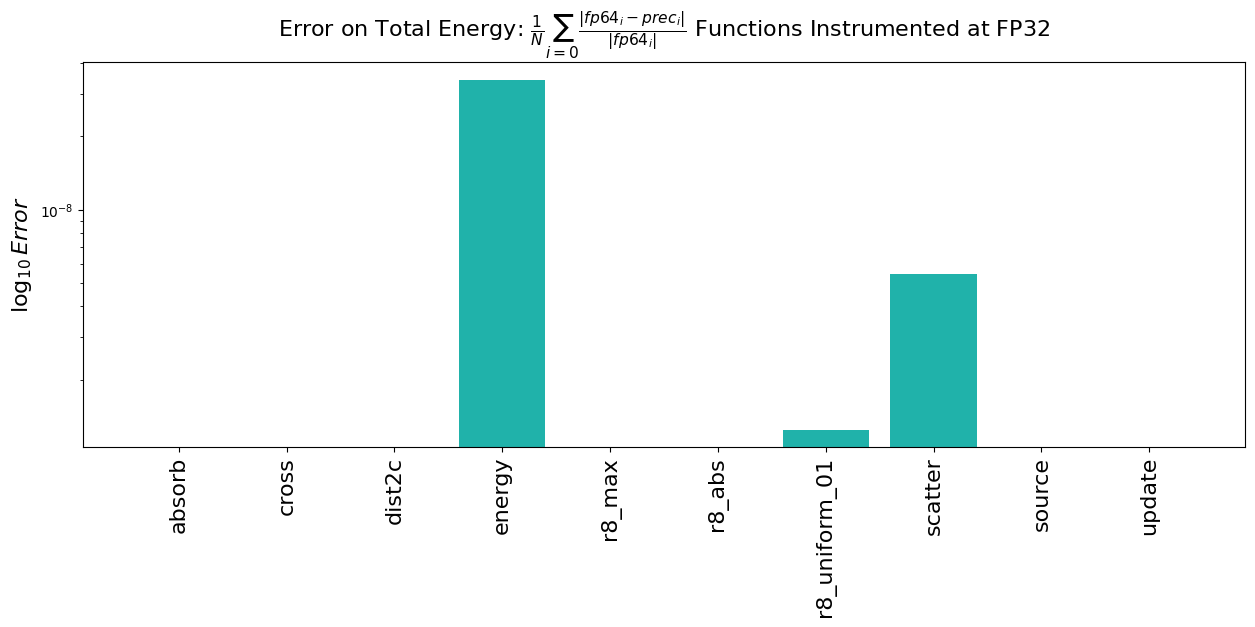

In [13]:
from matplotlib.patches import Patch

plt.figure(figsize=(15, 5))
#x_vals = np.arange(0,len(matching_lines))
bars = plt.bar(src_func_names, agg_energy_rel, color = 'lightseagreen')
for i, bar in enumerate(bars):
    if vc_length[i] > len(data_og):
        bar.set_hatch('/')
# legend_elements = [Patch(facecolor='blue', edgecolor='black', hatch='/', label='Stagnation')]
# plt.legend(handles=legend_elements, loc='best', fontsize=14)
plt.yscale('log')
plt.xticks(rotation=90, fontsize=16)
plt.title(r'Error on Total Energy: $\frac{1}{N}\sum_{i=0}{\frac{|fp64_i - prec_i|}{|fp64_i|}}$ Functions Instrumented at FP32', fontsize=16)
plt.ylabel(r'$\log_{10}{Error}$', fontsize=16)
plt.savefig('functions_reactor_energy_fp32_sum500it.png',  bbox_inches='tight', dpi=300)


In [8]:
agg_f_x_rel= []
agg_f_y_rel= []
agg_f_z_rel = []
agg_energy_rel = []
output_og = "./reactor_simulator_double.txt"
data_og = np.loadtxt(output_og, delimiter=';', max_rows=1400)[0:600]
origin_energy_og = data_og[-1].astype(np.float64)
timestep_og      = data_og[-1].astype(np.float64)
force_x_og       = data_og[-1].astype(np.float64) 
force_y_og       = data_og[-1].astype(np.float64)
force_z_og       = data_og[-1].astype(np.float64)

vc_length = []
t = 23
for elm in matching_lines: 
    output_VC = f"results/RS_{elm}_23_nb_10000.txt"
    data_VC = np.loadtxt(output_VC, delimiter=';', max_rows=1400)[0:600]
    origin_energy_VC = data_VC[-1].astype(np.float64)
    np.set_printoptions(precision=15)
    print(origin_energy_VC)
    min_len = min((origin_energy_og.size), (origin_energy_VC.size))
    #sum_x = np.sum(np.abs(force_x_og[:min_len]-force_x_VC[:min_len])/np.abs(force_x_og[:min_len]))
    #sum_y = np.sum(np.abs(force_y_og[:min_len]-force_y_VC[:min_len])/np.abs(force_y_og[:min_len]))
    #sum_z = np.sum(np.abs(force_z_og[:min_len]-force_z_VC[:min_len])/np.abs(force_z_og[:min_len]))
    #sum_x = sum_x/ min_len
    #sum_y = sum_y/ min_len
    #sum_z = sum_z/ min_len
    #agg_f_x_rel.append(sum_x)
    #agg_f_y_rel.append(sum_y)
    #agg_f_z_rel.append(sum_z)
    sum_energy = np.sum(np.abs(origin_energy_og-origin_energy_VC)/np.abs(origin_energy_og))
    sum_energy = sum_energy/min_len
    agg_energy_rel.append(sum_energy)

    vc_length.append(len(data_VC))

print(agg_energy_rel)

3652.5712513165827
3652.5712513165827
3652.5712513165827
3652.5711277382343
3652.5712513165827
3652.5712513165827
3652.571249043713
3652.571269685415
3652.5712513165827
3652.5712513165827
[0.0, 0.0, 0.0, 3.383324783847804e-08, 0.0, 0.0, 6.222656301132842e-10, 5.0290140429677904e-09, 0.0, 0.0]


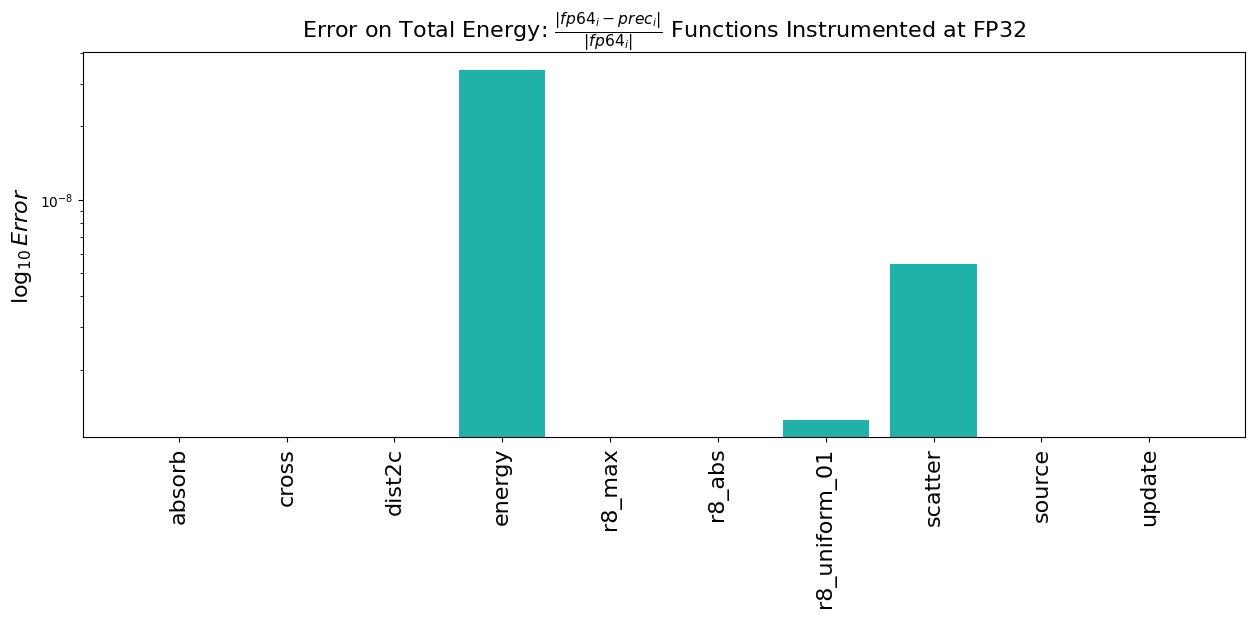

In [14]:
from matplotlib.patches import Patch

plt.figure(figsize=(15, 5))
#x_vals = np.arange(0,len(matching_lines))
bars = plt.bar(src_func_names, agg_energy_rel, color = 'lightseagreen')
for i, bar in enumerate(bars):
    if vc_length[i] > len(data_og):
        bar.set_hatch('/')
# legend_elements = [Patch(facecolor='blue', edgecolor='black', hatch='/', label='Stagnation')]
# plt.legend(handles=legend_elements, loc='best', fontsize=16)
plt.yscale('log')
plt.xticks(rotation=90, fontsize=16)
plt.title(r'Error on Total Energy: ${\frac{|fp64_i - prec_i|}{|fp64_i|}}$ Functions Instrumented at FP32', fontsize=16)
plt.ylabel(r'$\log_{10}{Error}$', fontsize=16)
plt.savefig('functions_reactor_energy_fp32_last_elm.png',  bbox_inches='tight', dpi=300)
